In [5]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px

In [8]:
df = pd.read_csv(r'C:\Users\erick\OneDrive\Desktop\Python\Data\Automobile.csv')
df.nunique()
df


,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


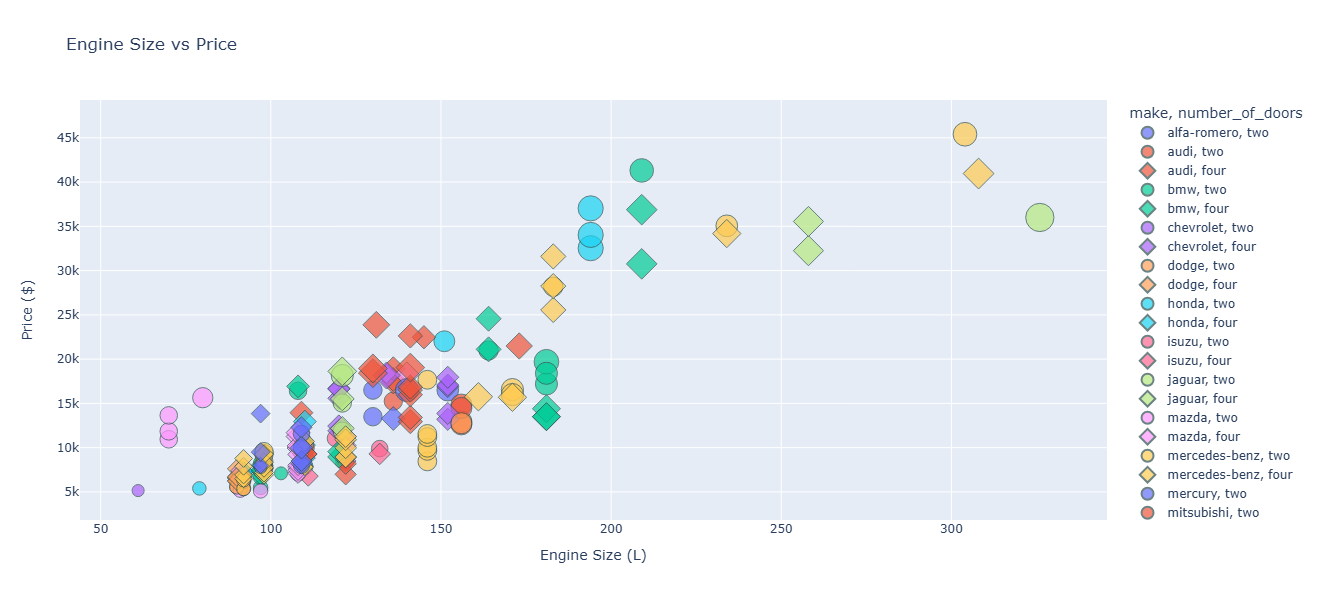

In [17]:
fig = px.scatter(
    df,
    x='engine_size',   # Column on X-axis
    y='price',        # Column on Y-axis
    color='make',     # Optional: Color by car make
    size='horsepower', # Optional: Size points by horsepower
    symbol='number_of_doors',
    hover_data=['make', 'horsepower'],  # Show extra info on hover
    title='Engine Size vs Price',
    labels={'engine_size': 'Engine Size (L)', 'price': 'Price ($)'},  # Rename axes/legend
    height=600,                # Plot height in pixels
    width=800                  # Plot width in pixels
)

fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))  # Marker outline

fig.show()

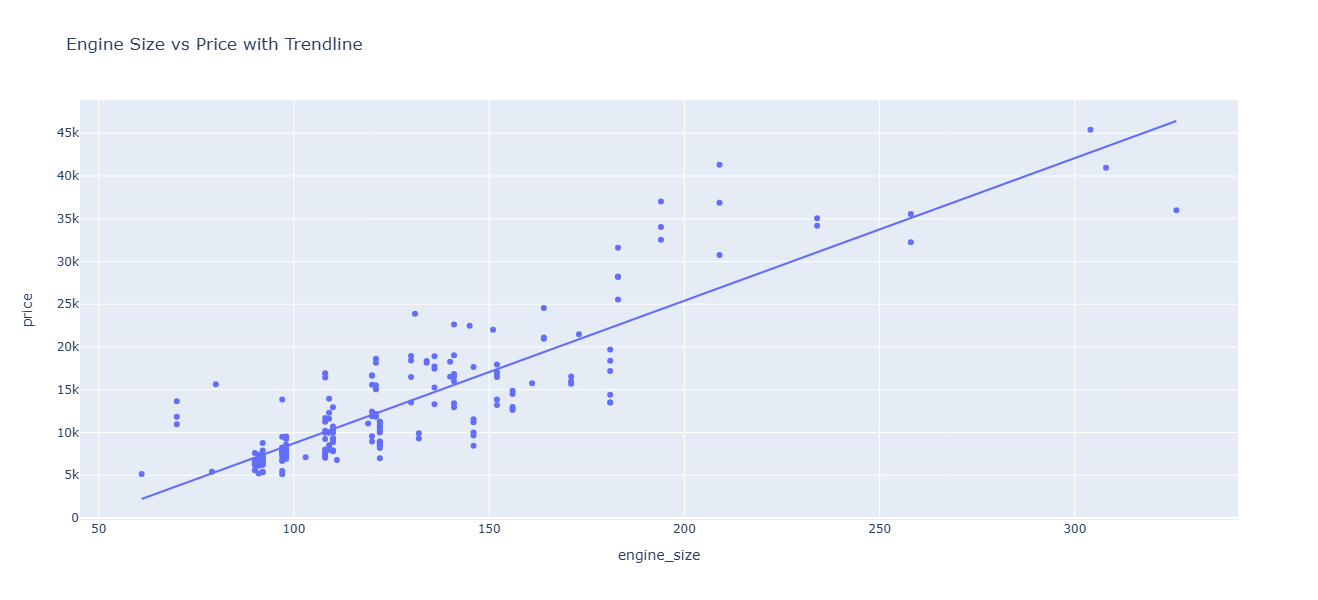

In [42]:
fig = px.scatter(
    df,
    x='engine_size',
    y='price',
    trendline='ols',  # Ordinary Least Squares Regression Line.  Cal also use lowess
    title='Engine Size vs Price with Trendline',
     height=600 ,
    width=600
)
fig.show()

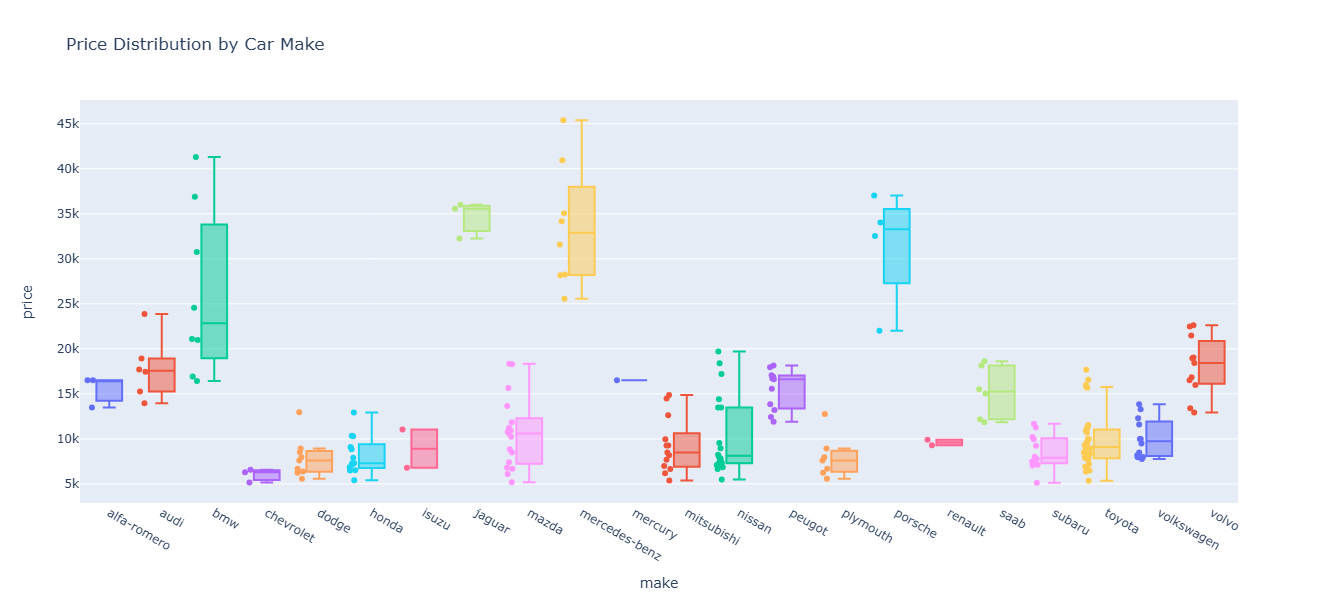

In [40]:
import plotly.express as px

fig = px.box(
    df,
    x='make',
    y='price',
    color='make',
    points='all',  # Show individual points ("outliers", "all", False)
    title='Price Distribution by Car Make',
    height=600 ,
    width=800
)

fig.update_layout(showlegend=False)  # Hide legend

fig.show()


In [ ]:
fig = px.line(
    df,
    x='year',
    y='price',
    color='make',
    title='Price Trend Over Years by Make'
)
fig.show()


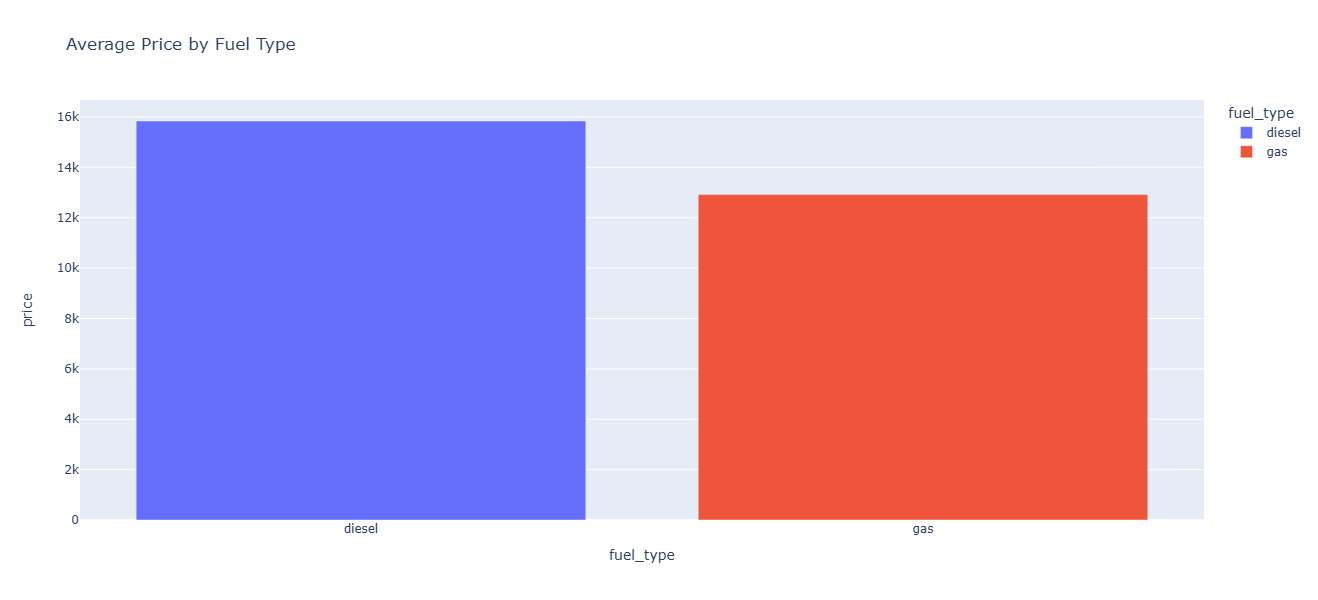

In [43]:
fig = px.bar(
    df.groupby('fuel_type', as_index=False)['price'].mean(),
    x='fuel_type',
    y='price',
    title='Average Price by Fuel Type',
    color='fuel_type',
    height=600 ,
    width=800
)
fig.show()


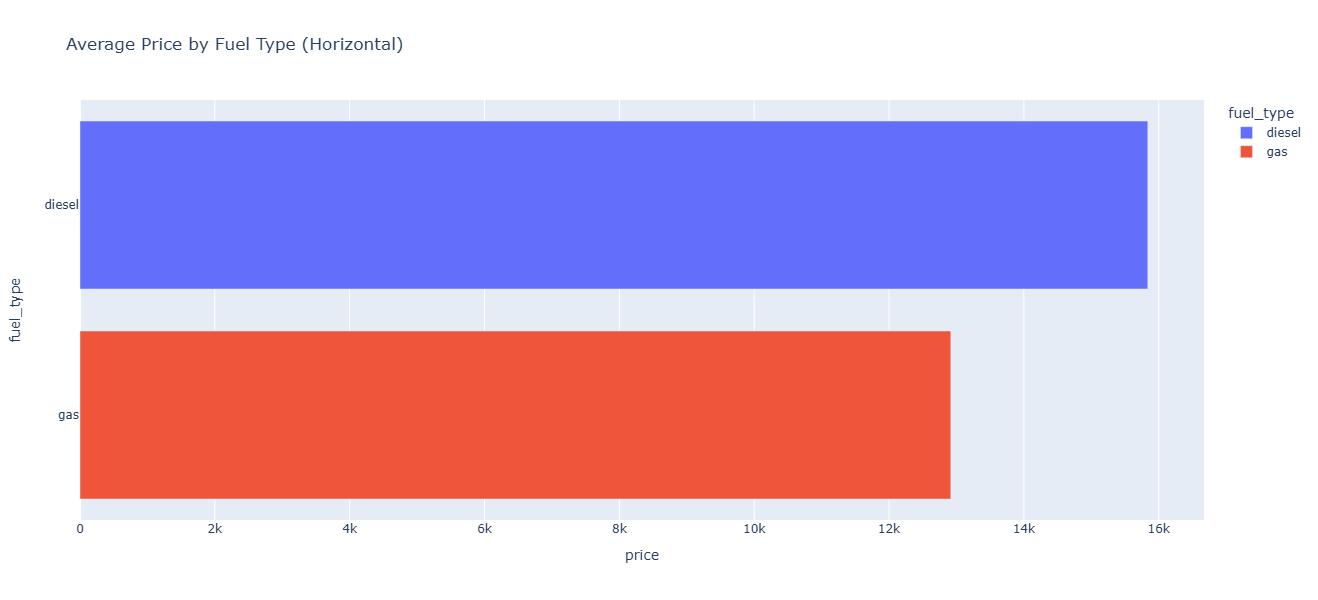

In [44]:
fig = px.bar(
    df.groupby('fuel_type', as_index=False)['price'].mean(),
    y='fuel_type',  # Swap x and y
    x='price',      # Swap x and y
    title='Average Price by Fuel Type (Horizontal)',
    color='fuel_type',
    orientation='h',  # This is the key!
    height=600 ,
    width=800
)
fig.show()


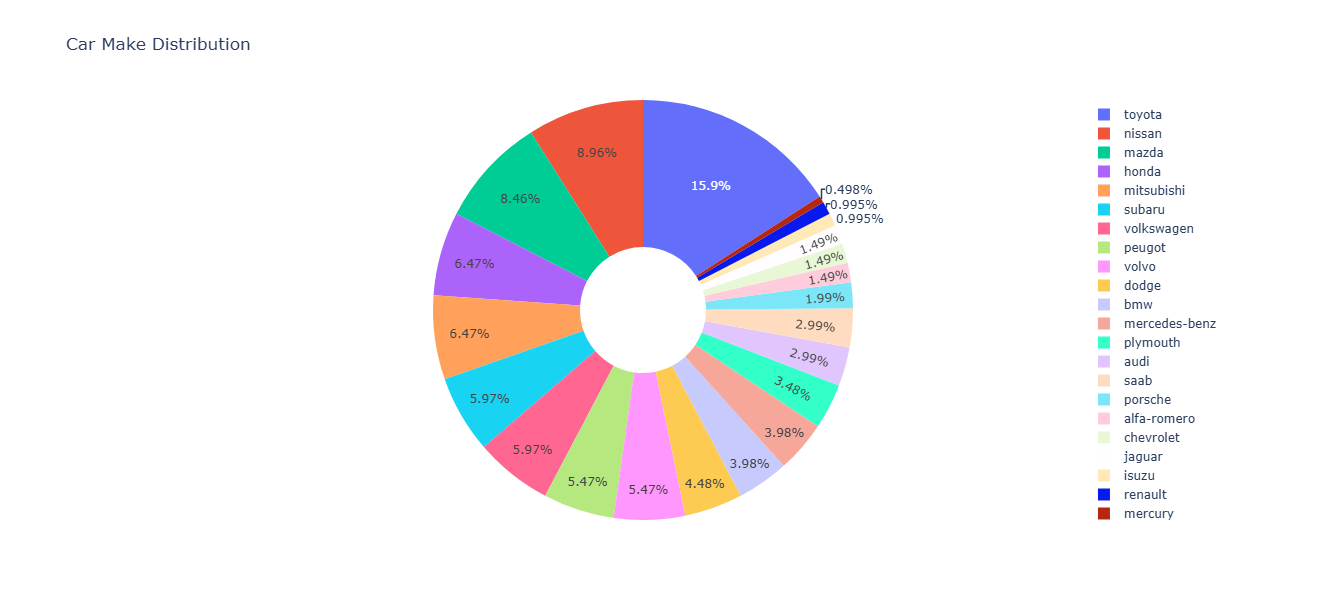

In [45]:
fig = px.pie(
    df,
    names='make',
    title='Car Make Distribution',
    hole=0.3,  # Optional: Donut style
    height=600 ,
    width=800
)
fig.show()


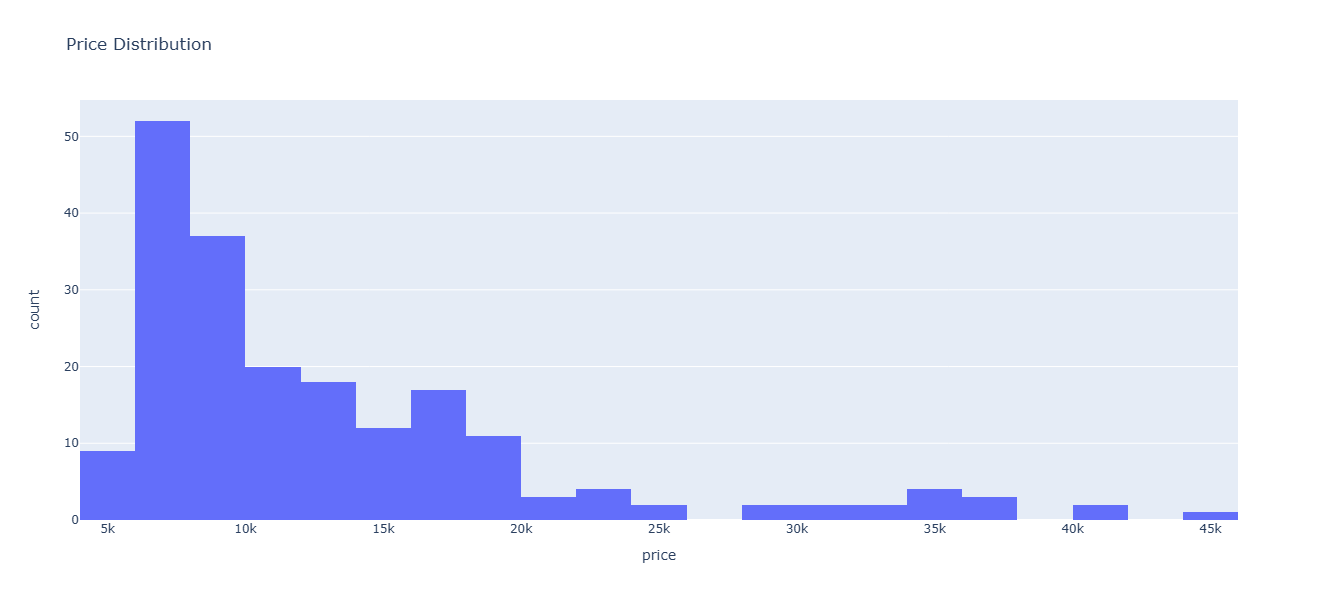

In [46]:
fig = px.histogram(
    df,
    x='price',
    nbins=30,  # Adjust the number of bins
    title='Price Distribution',
    height=600 ,
    width=800
)
fig.show()


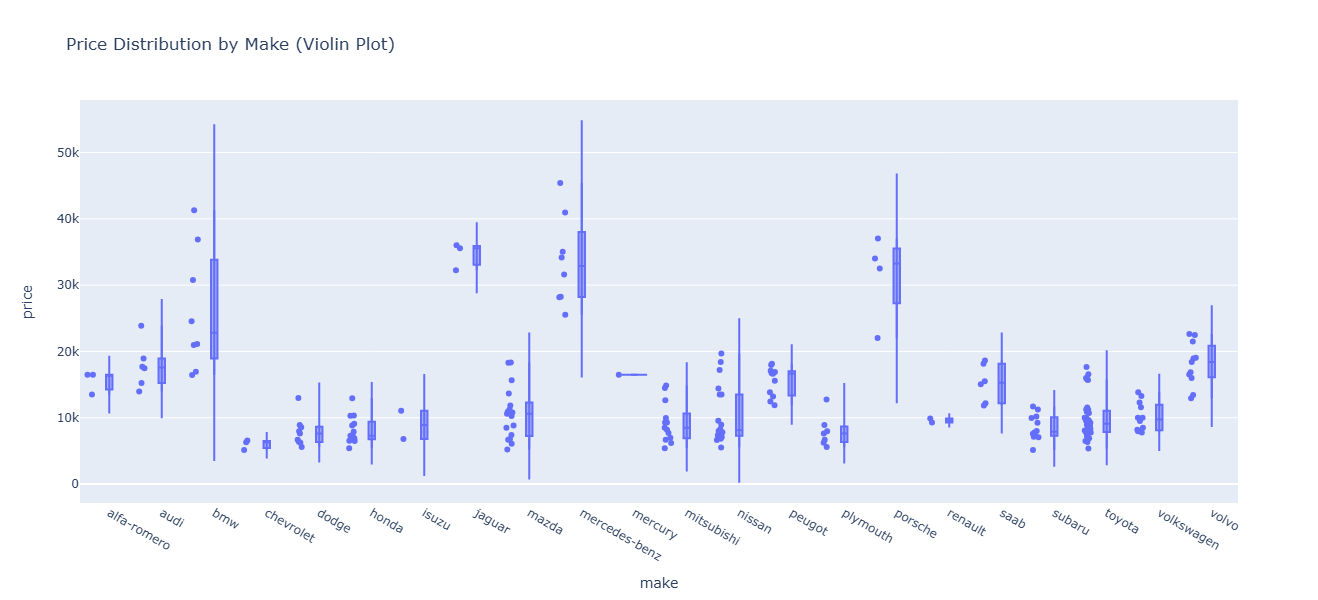

In [48]:
fig = px.violin(
    df,
    x='make',
    y='price',
    box=True,  # Show inner boxplot
    points='all',  # Show all points
    title='Price Distribution by Make (Violin Plot)',
    height=600 ,
    width=1000
)
fig.show()

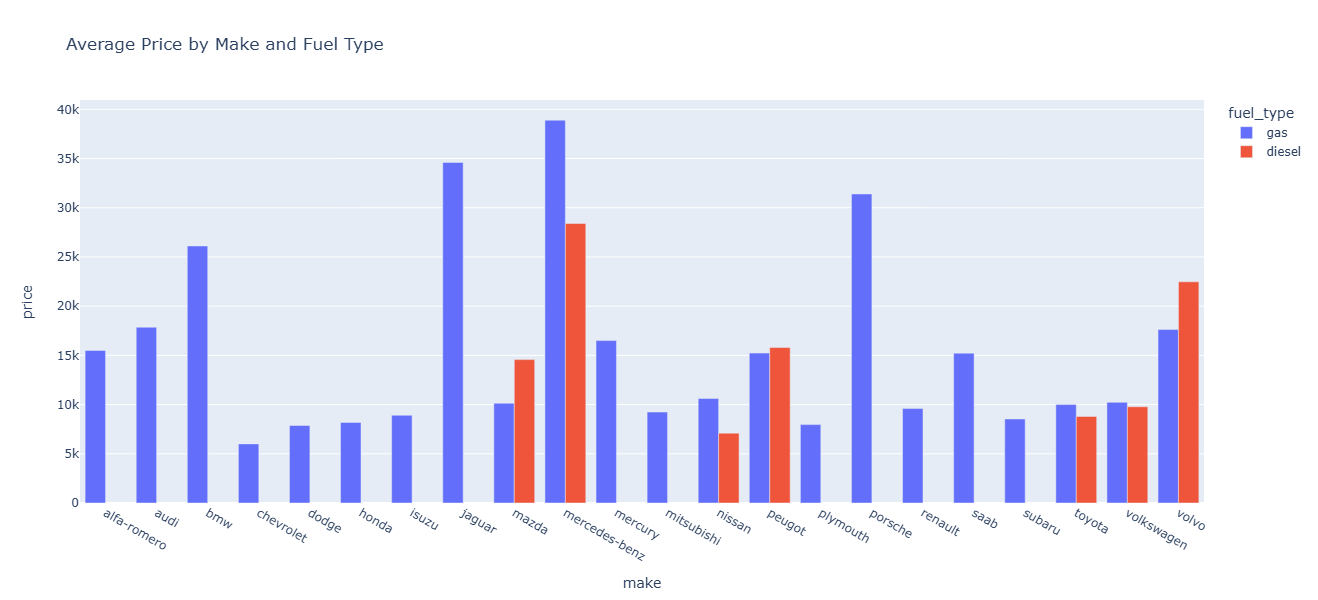

In [49]:
fig = px.bar(
    df.groupby(['make', 'fuel_type'], as_index=False)['price'].mean(),
    x='make',
    y='price',
    color='fuel_type',
    barmode='group',
    title='Average Price by Make and Fuel Type',
    height=600 ,
    width=800
)
fig.show()

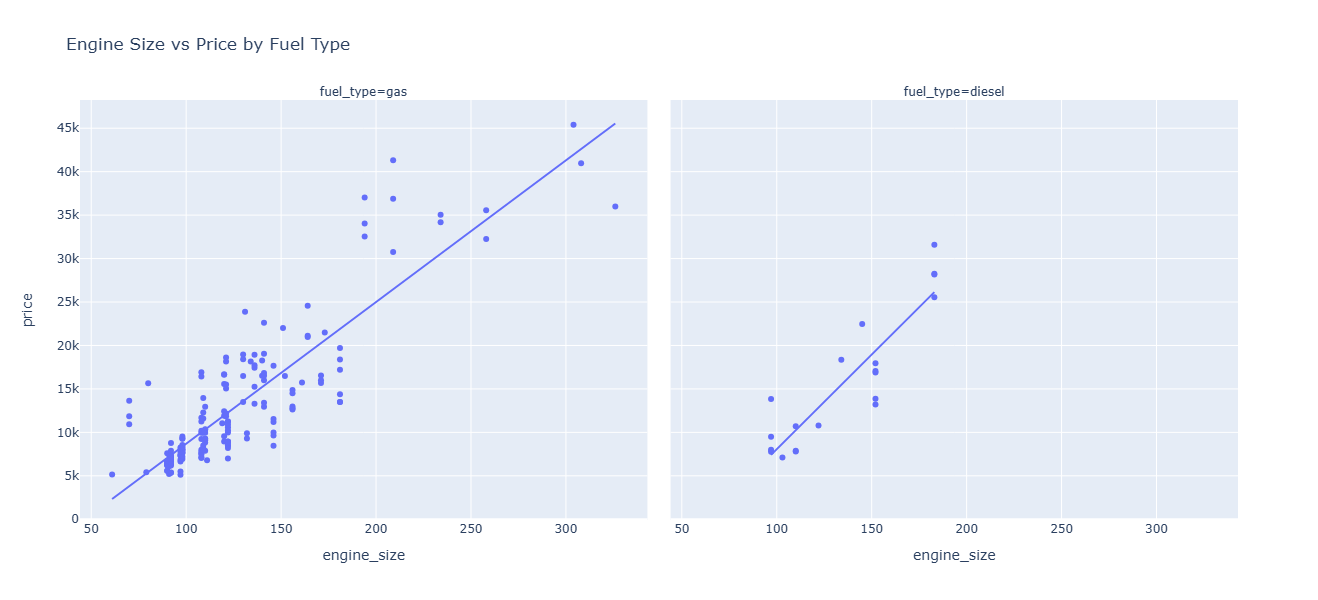

In [50]:
fig = px.scatter(
    df,
    x='engine_size',
    y='price',
    facet_col='fuel_type',
    trendline='ols',  # Ordinary Least Squares Regression Line.  Cal also use lowess
    title='Engine Size vs Price by Fuel Type',
    height=600 ,
    width=800
)
fig.show()

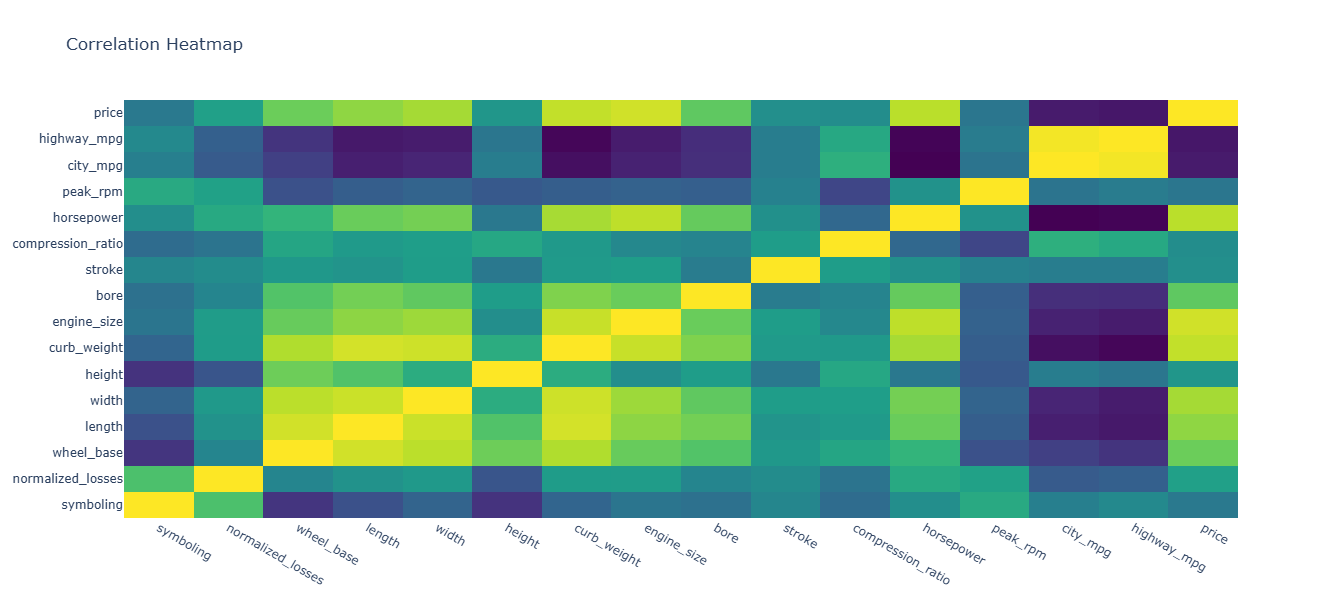

In [52]:
corr = df.select_dtypes('number').corr()

fig = go.Figure(
    data=go.Heatmap(
        z=corr.values,
        x=corr.columns,
        y=corr.columns,
        colorscale='Viridis',
        showscale=False  # THIS hides the color bar
    )
)

fig.update_layout(
    title='Correlation Heatmap',
    height=600,  # Height in pixels
    width=800    # Width in pixels
)

fig.show()
